In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

work_dir = '/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_Sammy'

import os
os.chdir(work_dir)

nsc_file_path = 'results/analysis/NSC_chromatin_changes_all.csv'
neu_file_path = 'results/analysis/Neu_chromatin_changes_all.csv'

In [87]:
nsc_df = pd.read_csv(nsc_file_path)
neu_df = pd.read_csv(neu_file_path)

# Check how many chromatin regions change moving from phase S2 (euchromatin) to S3 (heterochromatin) and vice versa after Mecp2 overexpression compared to the GFP control

## NSC

In [88]:
print(nsc_df.shape)
nsc_df.head()

(272564, 13)


,chrom,start,end,gfp_s2s,gfp_s3,gfp_diff,m2_s2s,m2_s3,m2_diff,condition_diff,abs_condition_diff,is_significant,change_type
0,chr1,0,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change
1,chr1,10000,20000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change
2,chr1,20000,30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change
3,chr1,30000,40000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change
4,chr1,40000,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change


Min abs_condition_diff: 0.0
Max abs_condition_diff: 297.77687062333985


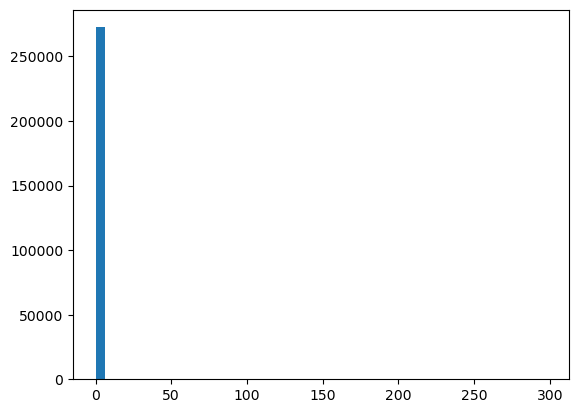

In [90]:
_ = plt.hist(nsc_df['abs_condition_diff'], bins=50)
print(f"Min abs_condition_diff: {nsc_df['abs_condition_diff'].min()}")
print(f"Max abs_condition_diff: {nsc_df['abs_condition_diff'].max()}")

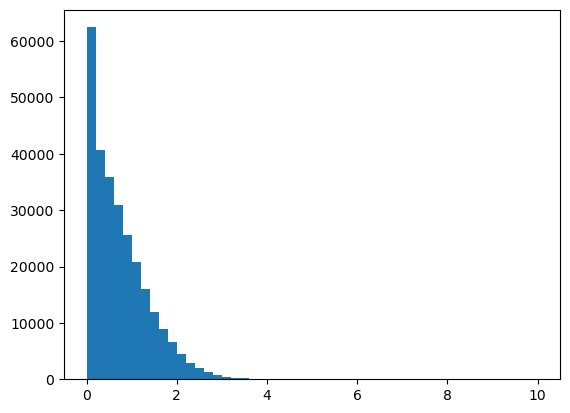

In [91]:
_ = plt.hist(nsc_df['abs_condition_diff'], range=(0,10), bins=50)

Threshold: 0.000, Number of regions with abs_condition_diff > 0.000: 259522
Threshold: 0.500, Number of regions with abs_condition_diff > 0.500: 150832
Threshold: 1.000, Number of regions with abs_condition_diff > 1.000: 77118
Threshold: 2.000, Number of regions with abs_condition_diff > 2.000: 12818
Threshold: 3.000, Number of regions with abs_condition_diff > 3.000: 1340
Threshold: 4.000, Number of regions with abs_condition_diff > 4.000: 116
Threshold: 5.000, Number of regions with abs_condition_diff > 5.000: 11
Threshold: 6.000, Number of regions with abs_condition_diff > 6.000: 4
Threshold: 7.000, Number of regions with abs_condition_diff > 7.000: 4
Threshold: 8.000, Number of regions with abs_condition_diff > 8.000: 4
Threshold: 9.000, Number of regions with abs_condition_diff > 9.000: 4
Threshold: 10.000, Number of regions with abs_condition_diff > 10.000: 3


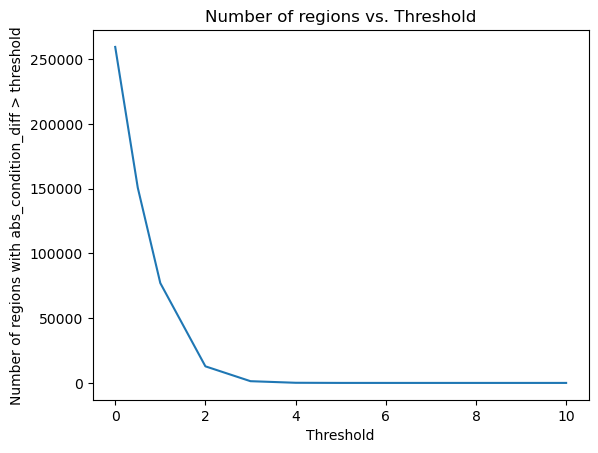

In [92]:
thresholds = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
counts = []

for th in thresholds:
    nsc_df_temp = nsc_df[nsc_df['abs_condition_diff'] > th]
    count = len(nsc_df_temp)
    counts.append(count)
    print(f'Threshold: {th:.3f}, Number of regions with abs_condition_diff > {th:.3f}: {count}')


plt.figure()
plt.plot(thresholds, counts)
plt.xlabel('Threshold')
plt.ylabel('Number of regions with abs_condition_diff > threshold')
plt.title('Number of regions vs. Threshold')
plt.show()

In [93]:
th = 2.0
nsc_df_filtered = nsc_df[nsc_df['abs_condition_diff'] > th]

print(nsc_df_filtered.shape)
print(f"percentage of data filtered out: {100.0 - nsc_df_filtered.shape[0] / nsc_df.shape[0] * 100:.2f}%")
nsc_df_filtered.head()
nsc_df = nsc_df_filtered

(12818, 13)
percentage of data filtered out: 95.30%


In [95]:
# Choose a single chromosome to display (e.g., chromosome 1)
chrom_to_display = "chr13"

# Filter the data for the selected chromosome and sort by start position
chrom_data = nsc_df_filtered[nsc_df_filtered['chrom'] == chrom_to_display].sort_values('start')
chrom_data.head()

,chrom,start,end,gfp_s2s,gfp_s3,gfp_diff,m2_s2s,m2_s3,m2_diff,condition_diff,abs_condition_diff,is_significant,change_type
177190,chr13,3790000,3800000,4.141661,5.432647,1.290987,5.678634,4.737532,-0.941102,-2.232089,2.232089,True,S3 to S2S
177215,chr13,4040000,4050000,3.283385,5.148570,1.865185,4.242570,3.994063,-0.248506,-2.113691,2.113691,True,S3 to S2S
177249,chr13,4380000,4390000,2.722872,4.108933,1.386061,3.823686,3.141037,-0.682649,-2.068710,2.068710,True,S3 to S2S
177266,chr13,4550000,4560000,1.941155,5.260793,3.319638,3.313818,4.221538,0.907720,-2.411919,2.411919,True,S3 to S2S
177322,chr13,5110000,5120000,2.524964,5.663982,3.139018,3.848990,4.696951,0.847961,-2.291057,2.291057,True,S3 to S2S


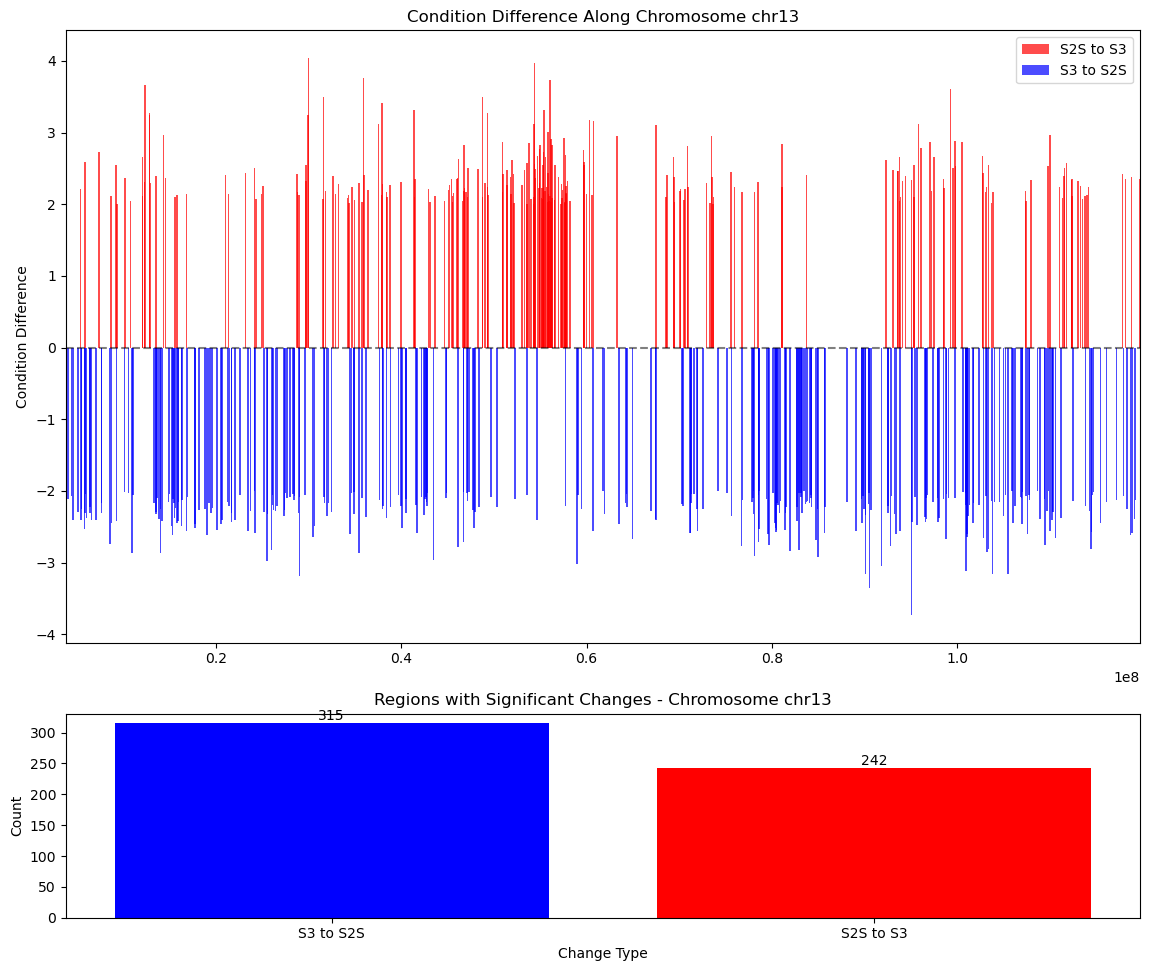

In [96]:
# Check if we have data for the selected chromosome
if chrom_data.empty:
    print(f"No data available for chromosome {chrom_to_display} with the current threshold.")
else:
    fig, axs = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3.0)

    # Check for NaN or Inf values in the data
    start_min = chrom_data['start'].min()
    start_max = chrom_data['start'].max()
    
    if not (np.isfinite(start_min) and np.isfinite(start_max)):
        print("Warning: Non-finite values detected in genomic positions. Using default range.")
        start_min, start_max = 0, 1000000  # Default range
    
    # Plot 1: Bar plot of condition_diff along the chromosome
    axs[0].set_title(f'Condition Difference Along Chromosome {chrom_to_display}')
    
    # Create bar plots colored by change_type
    s2s_to_s3 = chrom_data[chrom_data['change_type'] == 'S2S to S3']
    s3_to_s2s = chrom_data[chrom_data['change_type'] == 'S3 to S2S']
    
    # Plot bars with different colors based on change_type
    axs[0].bar(s2s_to_s3['start'], s2s_to_s3['condition_diff'], 
               width=(start_max-start_min)/len(chrom_data)*0.8, 
               color='red', label='S2S to S3', alpha=0.7)
    axs[0].bar(s3_to_s2s['start'], s3_to_s2s['condition_diff'], 
               width=(start_max-start_min)/len(chrom_data)*0.8, 
               color='blue', label='S3 to S2S', alpha=0.7)
    
    # Add a horizontal line at y=0 for reference
    axs[0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    axs[0].set_ylabel('Condition Difference')
    axs[0].set_xlim(start_min, start_max)
    axs[0].legend()
    
    # Plot 2: Bar representation of regions
    axs[1].set_title(f'Regions with Significant Changes - Chromosome {chrom_to_display}')
    
    # Group data by change_type and count
    change_counts = chrom_data['change_type'].value_counts()
    
    # Create a bar chart for the counts
    bars = axs[1].bar(change_counts.index, change_counts.values, 
                      color=['red' if x == 'S2S to S3' else 'blue' for x in change_counts.index])
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom')
    
    axs[1].set_xlabel('Change Type')
    axs[1].set_ylabel('Count')
    
    plt.show()

## Neu

In [97]:
print(neu_df.shape)
neu_df.head()

(272564, 13)


,chrom,start,end,gfp_s2s,gfp_s3,gfp_diff,m2_s2s,m2_s3,m2_diff,condition_diff,abs_condition_diff,is_significant,change_type
0,chr1,0,10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change
1,chr1,10000,20000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change
2,chr1,20000,30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change
3,chr1,30000,40000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change
4,chr1,40000,50000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,No change


In [127]:
neu_df.change_type.value_counts()

change_type
S3 to S2S    34788
S2S to S3    31767
No change      881
Name: count, dtype: int64

Min abs_condition_diff: 0.0
Max abs_condition_diff: 3790.759820695917


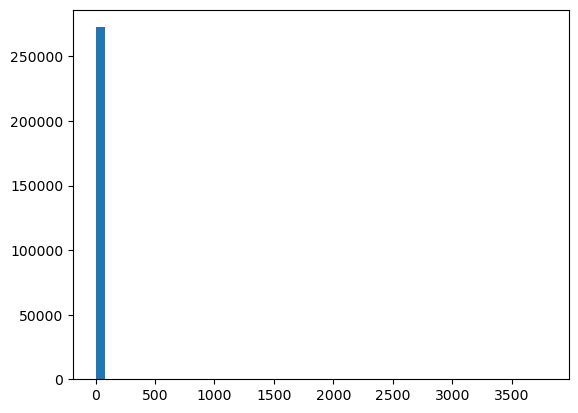

In [98]:
_ = plt.hist(neu_df['abs_condition_diff'], bins=50)
print(f"Min abs_condition_diff: {neu_df['abs_condition_diff'].min()}")
print(f"Max abs_condition_diff: {neu_df['abs_condition_diff'].max()}")

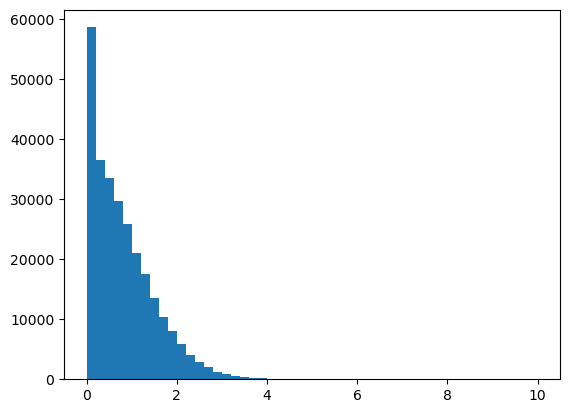

In [99]:
_ = plt.hist(neu_df['abs_condition_diff'], range=(0,10), bins=50)

Threshold: 0.000, Number of regions with abs_condition_diff > 0.000: 254535
Threshold: 0.500, Number of regions with abs_condition_diff > 0.500: 160238
Threshold: 1.000, Number of regions with abs_condition_diff > 1.000: 88523
Threshold: 2.000, Number of regions with abs_condition_diff > 2.000: 18207
Threshold: 3.000, Number of regions with abs_condition_diff > 3.000: 2337
Threshold: 4.000, Number of regions with abs_condition_diff > 4.000: 229
Threshold: 5.000, Number of regions with abs_condition_diff > 5.000: 38
Threshold: 6.000, Number of regions with abs_condition_diff > 6.000: 16
Threshold: 7.000, Number of regions with abs_condition_diff > 7.000: 11
Threshold: 8.000, Number of regions with abs_condition_diff > 8.000: 11
Threshold: 9.000, Number of regions with abs_condition_diff > 9.000: 9
Threshold: 10.000, Number of regions with abs_condition_diff > 10.000: 9


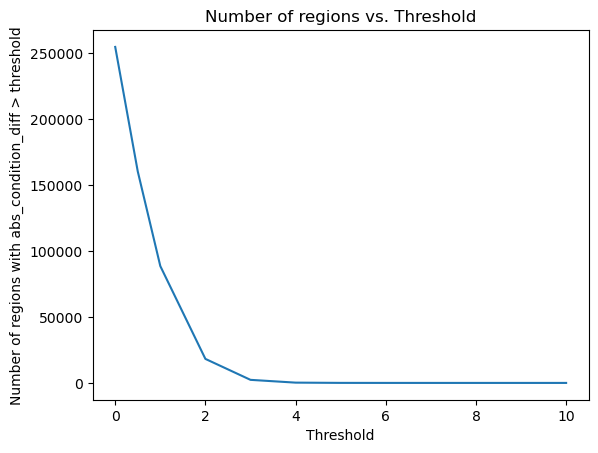

In [100]:
thresholds = [0.0, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
counts = []

for th in thresholds:
    neu_df_temp = neu_df[neu_df['abs_condition_diff'] > th]
    count = len(neu_df_temp)
    counts.append(count)
    print(f'Threshold: {th:.3f}, Number of regions with abs_condition_diff > {th:.3f}: {count}')


plt.figure()
plt.plot(thresholds, counts)
plt.xlabel('Threshold')
plt.ylabel('Number of regions with abs_condition_diff > threshold')
plt.title('Number of regions vs. Threshold')
plt.show()

In [101]:
th = 2.0
neu_df_filtered = neu_df[neu_df['abs_condition_diff'] > th]

print(neu_df_filtered.shape)
print(f"percentage of data filtered out: {100.0 - neu_df_filtered.shape[0] / neu_df.shape[0] * 100:.2f}%")
neu_df_filtered.head()
neu_df = neu_df_filtered

(18207, 13)
percentage of data filtered out: 93.32%


In [102]:
# Choose a single chromosome to display (e.g., chromosome 1)
chrom_to_display = "chr13"

# Filter the data for the selected chromosome and sort by start position
chrom_data = neu_df_filtered[neu_df_filtered['chrom'] == chrom_to_display].sort_values('start')
chrom_data.head()

,chrom,start,end,gfp_s2s,gfp_s3,gfp_diff,m2_s2s,m2_s3,m2_diff,condition_diff,abs_condition_diff,is_significant,change_type
177136,chr13,3250000,3260000,4.480005,4.213155,-0.266850,5.734477,3.442740,-2.291738,-2.024888,2.024888,True,S3 to S2S
177141,chr13,3300000,3310000,4.950382,5.409715,0.459332,6.313376,4.102624,-2.210752,-2.670085,2.670085,True,S3 to S2S
177144,chr13,3330000,3340000,3.890664,4.695951,0.805287,4.506484,2.543092,-1.963391,-2.768679,2.768679,True,S3 to S2S
177158,chr13,3470000,3480000,3.997605,5.206048,1.208443,5.244542,4.394368,-0.850174,-2.058617,2.058617,True,S3 to S2S
177177,chr13,3660000,3670000,4.764126,5.083517,0.319391,6.335181,4.511012,-1.824168,-2.143559,2.143559,True,S3 to S2S


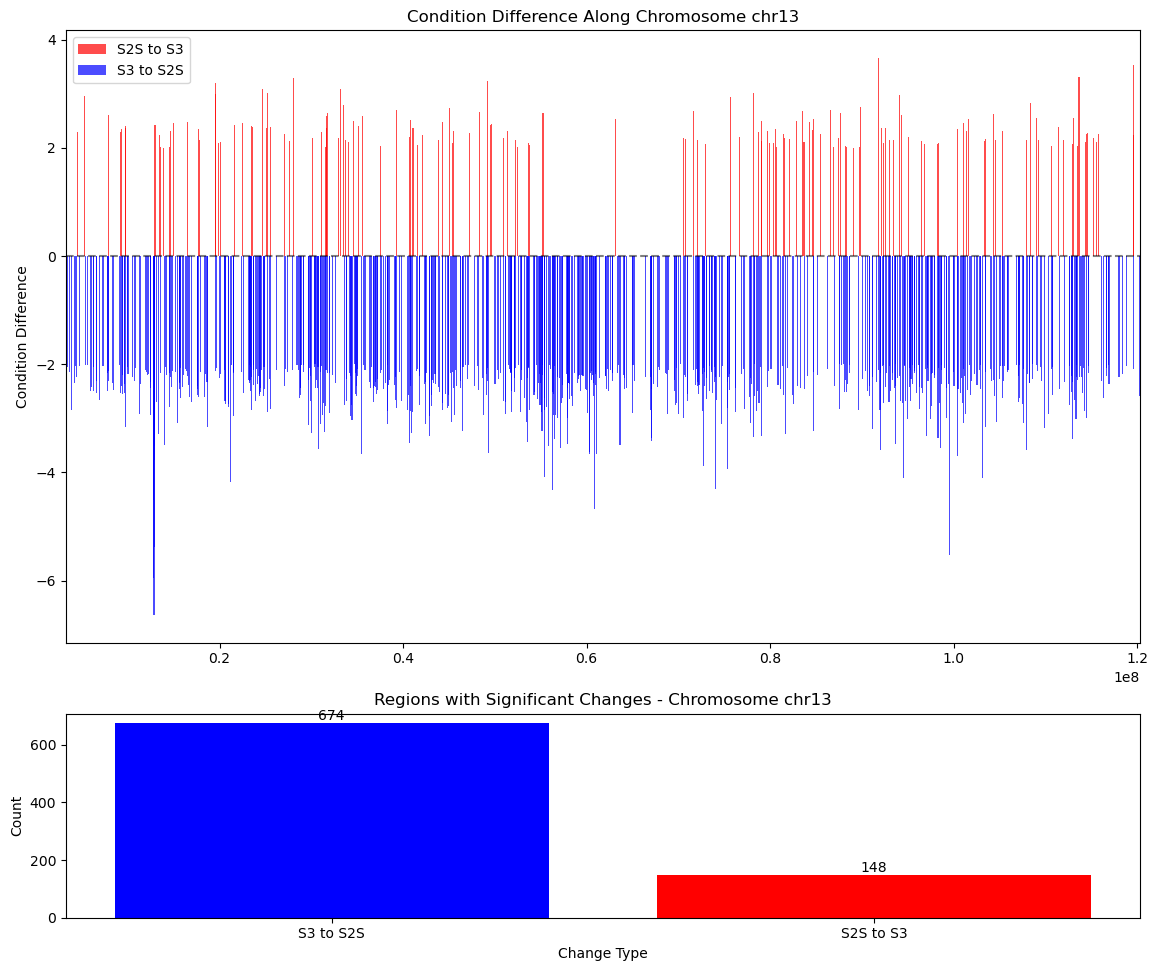

In [103]:
# Check if we have data for the selected chromosome
if chrom_data.empty:
    print(f"No data available for chromosome {chrom_to_display} with the current threshold.")
else:
    fig, axs = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3.0)

    # Check for NaN or Inf values in the data
    start_min = chrom_data['start'].min()
    start_max = chrom_data['start'].max()
    
    if not (np.isfinite(start_min) and np.isfinite(start_max)):
        print("Warning: Non-finite values detected in genomic positions. Using default range.")
        start_min, start_max = 0, 1000000  # Default range
    
    # Plot 1: Bar plot of condition_diff along the chromosome
    axs[0].set_title(f'Condition Difference Along Chromosome {chrom_to_display}')
    
    # Create bar plots colored by change_type
    s2s_to_s3 = chrom_data[chrom_data['change_type'] == 'S2S to S3']
    s3_to_s2s = chrom_data[chrom_data['change_type'] == 'S3 to S2S']
    
    # Plot bars with different colors based on change_type
    axs[0].bar(s2s_to_s3['start'], s2s_to_s3['condition_diff'], 
               width=(start_max-start_min)/len(chrom_data)*0.8, 
               color='red', label='S2S to S3', alpha=0.7)
    axs[0].bar(s3_to_s2s['start'], s3_to_s2s['condition_diff'], 
               width=(start_max-start_min)/len(chrom_data)*0.8, 
               color='blue', label='S3 to S2S', alpha=0.7)
    
    # Add a horizontal line at y=0 for reference
    axs[0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    axs[0].set_ylabel('Condition Difference')
    axs[0].set_xlim(start_min, start_max)
    axs[0].legend()
    
    # Plot 2: Bar representation of regions
    axs[1].set_title(f'Regions with Significant Changes - Chromosome {chrom_to_display}')
    
    # Group data by change_type and count
    change_counts = chrom_data['change_type'].value_counts()
    
    # Create a bar chart for the counts
    bars = axs[1].bar(change_counts.index, change_counts.values, 
                      color=['red' if x == 'S2S to S3' else 'blue' for x in change_counts.index])
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom')
    
    axs[1].set_xlabel('Change Type')
    axs[1].set_ylabel('Count')
    
    plt.show()

# Check the phase of the target genes (from the list `endo_gene_list_neu.txt` and `endo_gene_list_nsc.txt`) of *endogenous* Mecp2 by comparing neurons and NSCs (*only in GFP* group).

In [ ]:
def task2_analyze_endogenous_target_genes(gene_list_files, gtf_file, bigwig_dir, output_dir, cache):
    """Task 2: Check phase of target genes of endogenous Mecp2."""
    # Create cache key
    cache_key = {
        'function': 'task2_analyze_endogenous_target_genes',
        'gene_list_files': [str(f) for f in gene_list_files],
        'gtf_file': str(gtf_file)
    }
    
    # Try to load from cache
    cached_result = cache.get(cache_key)
    if cached_result is not None:
        return cached_result
    
    # Process each cell type with its corresponding gene list
    cell_types = ['Neu', 'NSC']
    results = {}
    
    for i, cell_type in enumerate(cell_types):
        if i < len(gene_list_files):
            gene_list_file = gene_list_files[i]
            
            # Load gene list and coordinates
            genes = load_gene_list(gene_list_file)
            if not genes:
                continue
                
            gene_coords = load_gene_coordinates(genes, gtf_file)
            if not gene_coords:
                continue
            
            # Get GFP bigWig files for this cell type
            s2s_files = get_bigwig_files(bigwig_dir, cell_type, "GFP", "S2S")
            s3_files = get_bigwig_files(bigwig_dir, cell_type, "GFP", "S3")
            
            # Analyze gene phase
            cell_results = analyze_gene_chromatin_state(gene_coords, s2s_files, s3_files, cache)
            cell_results['cell_type'] = cell_type
            results[cell_type] = cell_results
            
            # Save individual results
            cell_results.to_csv(output_dir / f"task2_{cell_type}_target_genes_phase.csv", index=False)
    
    # If we have results for both cell types, create comparison visualizations
    if 'Neu' in results and 'NSC' in results:
        # Visualize phase distribution
        create_phase_comparison_plot(
            results['Neu'], results['NSC'], 
            "Endogenous Mecp2 Target Genes", 
            output_dir / "task2_phase_comparison.pdf"
        )
        
        # Create a heatmap of S3/S2S ratios
        create_ratio_heatmap(
            results['Neu'], results['NSC'], 
            "Endogenous Mecp2 Target Genes",
            output_dir / "task2_ratio_heatmap.pdf"
        )
    
    # Combine all results
    combined_results = pd.concat(list(results.values()), ignore_index=True) if results else pd.DataFrame()
    if not combined_results.empty:
        combined_results.to_csv(output_dir / "task2_target_genes_phase.csv", index=False)
    
    # Cache the results before returning
    cache.set(cache_key, combined_results)
    return combined_results